# Import libraries

In [2]:
#import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
path = r'D:\CF NHL Project\2 Data'

In [4]:
game_player_stats = pd.read_csv(os.path.join(path, 'Prepared Data', 'game_team_stats_updated.csv'), index_col = False)

In [5]:
#Enable visuals
%matplotlib inline

In [6]:
# Removing unnamed data
game_player_stats = game_player_stats.drop(columns = ['Unnamed: 0'])

In [7]:
game_player_stats

,game_id,season,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,venue,venue_time_zone_id,...,team_goals,team_shots,team_hits,team_pim,powerPlayOpportunities,team_powerPlayGoals,faceOffWinPercentage,team_giveaways,team_takeaways,team_blocked
0,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0
1,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0
2,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0
3,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0
4,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853309,2018030417,20182019,2019-06-13T00:00:00Z,19,6,4,1,away win REG,TD Garden,America/New_York,...,1,33,28.0,0,1,0,51.0,13.0,6.0,7.0
853310,2018030417,20182019,2019-06-13T00:00:00Z,19,6,4,1,away win REG,TD Garden,America/New_York,...,1,33,28.0,0,1,0,51.0,13.0,6.0,7.0
853311,2018030417,20182019,2019-06-13T00:00:00Z,19,6,4,1,away win REG,TD Garden,America/New_York,...,1,33,28.0,0,1,0,51.0,13.0,6.0,7.0
853312,2018030417,20182019,2019-06-13T00:00:00Z,19,6,4,1,away win REG,TD Garden,America/New_York,...,1,33,28.0,0,1,0,51.0,13.0,6.0,7.0


In [8]:
game_player_stats['date'] = pd.to_datetime(game_player_stats['date_time_GMT']).dt.date

In [9]:
game_player_stats.head()

,game_id,season,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,venue,venue_time_zone_id,...,team_shots,team_hits,team_pim,powerPlayOpportunities,team_powerPlayGoals,faceOffWinPercentage,team_giveaways,team_takeaways,team_blocked,date
0,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,28,20.0,8,3,2,49.1,16.0,8.0,9.0,2016-10-19
1,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,28,20.0,8,3,2,49.1,16.0,8.0,9.0,2016-10-19
2,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,28,20.0,8,3,2,49.1,16.0,8.0,9.0,2016-10-19
3,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,28,20.0,8,3,2,49.1,16.0,8.0,9.0,2016-10-19
4,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,28,20.0,8,3,2,49.1,16.0,8.0,9.0,2016-10-19


In [10]:
game_player_stats.columns

Index(['game_id', 'season', 'date_time_GMT', 'away_team_id', 'home_team_id',
       'away_goals', 'home_goals', 'outcome', 'venue', 'venue_time_zone_id',
       'venue_time_zone_tz', 'player_id', 'firstName', 'lastName',
       'nationality', 'birthCity', 'primaryPosition', 'birthDate', 'height',
       'height_cm', 'weight', 'side_shot_from', 'team_id', 'timeOnIce',
       'assists', 'goals', 'shots', 'hits', 'powerPlayGoals',
       'powerPlayAssists', 'penaltyMinutes', 'faceOffWins', 'faceoffTaken',
       'takeaways', 'giveaways', 'shortHandedGoals', 'shortHandedAssists',
       'blocked', 'plusMinus', 'evenTimeOnIce', 'shortHandedTimeOnIce',
       'powerPlayTimeOnIce', 'franchiseId', 'team_location', 'teamName',
       'state_province', 'abbreviation', 'home_or_away', 'won', 'settled_in',
       'head_coach', 'team_goals', 'team_shots', 'team_hits', 'team_pim',
       'powerPlayOpportunities', 'team_powerPlayGoals', 'faceOffWinPercentage',
       'team_giveaways', 'team_takeaways

In [11]:
#Making single team subset
game_player_colo = game_player_stats.loc[game_player_stats['team_location'] == 'Colorado']

In [12]:
game_player_colo.head()

,game_id,season,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,venue,venue_time_zone_id,...,team_shots,team_hits,team_pim,powerPlayOpportunities,team_powerPlayGoals,faceOffWinPercentage,team_giveaways,team_takeaways,team_blocked,date
72,2015020314,20152016,2015-11-24T01:00:00Z,21,52,4,1,away win REG,MTS Centre,America/Winnipeg,...,29,17.0,9,3,1,45.7,13.0,5.0,20.0,2015-11-24
73,2015020314,20152016,2015-11-24T01:00:00Z,21,52,4,1,away win REG,MTS Centre,America/Winnipeg,...,29,17.0,9,3,1,45.7,13.0,5.0,20.0,2015-11-24
74,2015020314,20152016,2015-11-24T01:00:00Z,21,52,4,1,away win REG,MTS Centre,America/Winnipeg,...,29,17.0,9,3,1,45.7,13.0,5.0,20.0,2015-11-24
75,2015020314,20152016,2015-11-24T01:00:00Z,21,52,4,1,away win REG,MTS Centre,America/Winnipeg,...,29,17.0,9,3,1,45.7,13.0,5.0,20.0,2015-11-24
76,2015020314,20152016,2015-11-24T01:00:00Z,21,52,4,1,away win REG,MTS Centre,America/Winnipeg,...,29,17.0,9,3,1,45.7,13.0,5.0,20.0,2015-11-24


In [13]:
#making variable subset for whole league
game_player_sub = game_player_stats[['date', 'team_goals', 'team_shots', 'team_hits', 'team_pim', 'team_giveaways', 'team_takeaways', 'team_blocked']]

In [14]:
game_player_sub

,date,team_goals,team_shots,team_hits,team_pim,team_giveaways,team_takeaways,team_blocked
0,2016-10-19,7,28,20.0,8,16.0,8.0,9.0
1,2016-10-19,7,28,20.0,8,16.0,8.0,9.0
2,2016-10-19,7,28,20.0,8,16.0,8.0,9.0
3,2016-10-19,7,28,20.0,8,16.0,8.0,9.0
4,2016-10-19,7,28,20.0,8,16.0,8.0,9.0
...,...,...,...,...,...,...,...,...
853309,2019-06-13,1,33,28.0,0,13.0,6.0,7.0
853310,2019-06-13,1,33,28.0,0,13.0,6.0,7.0
853311,2019-06-13,1,33,28.0,0,13.0,6.0,7.0
853312,2019-06-13,1,33,28.0,0,13.0,6.0,7.0


In [15]:
game_player_sub_nodup = game_player_sub.drop_duplicates()

In [16]:
game_player_sub_nodup

,date,team_goals,team_shots,team_hits,team_pim,team_giveaways,team_takeaways,team_blocked
0,2016-10-19,7,28,20.0,8,16.0,8.0,9.0
18,2016-10-19,4,27,30.0,6,12.0,9.0,11.0
36,2018-02-07,3,33,17.0,8,5.0,6.0,14.0
54,2018-02-07,4,34,16.0,6,7.0,4.0,14.0
72,2015-11-24,4,29,17.0,9,13.0,5.0,20.0
...,...,...,...,...,...,...,...,...
853224,2019-06-07,1,39,43.0,2,4.0,11.0,15.0
853242,2019-06-10,1,29,29.0,20,12.0,11.0,9.0
853260,2019-06-10,5,32,27.0,10,4.0,10.0,16.0
853278,2019-06-13,4,20,36.0,2,7.0,8.0,21.0


In [17]:
game_player_colo.shape

(27925, 62)

In [18]:
#making variable subset for single team
game_player_colo_sub = game_player_colo[['date', 'team_goals', 'team_shots', 'team_hits', 'team_pim', 'team_giveaways', 'team_takeaways', 'team_blocked']]

In [19]:
game_player_colo_sub

,date,team_goals,team_shots,team_hits,team_pim,team_giveaways,team_takeaways,team_blocked
72,2015-11-24,4,29,17.0,9,13.0,5.0,20.0
73,2015-11-24,4,29,17.0,9,13.0,5.0,20.0
74,2015-11-24,4,29,17.0,9,13.0,5.0,20.0
75,2015-11-24,4,29,17.0,9,13.0,5.0,20.0
76,2015-11-24,4,29,17.0,9,13.0,5.0,20.0
...,...,...,...,...,...,...,...,...
852697,2019-05-09,2,29,27.0,6,11.0,3.0,18.0
852698,2019-05-09,2,29,27.0,6,11.0,3.0,18.0
852699,2019-05-09,2,29,27.0,6,11.0,3.0,18.0
852700,2019-05-09,2,29,27.0,6,11.0,3.0,18.0


In [20]:
game_player_colo_sub_nd = game_player_colo_sub.drop_duplicates()

In [21]:
game_player_colo_sub_nd

,date,team_goals,team_shots,team_hits,team_pim,team_giveaways,team_takeaways,team_blocked
72,2015-11-24,4,29,17.0,9,13.0,5.0,20.0
306,2018-01-05,2,32,20.0,8,5.0,5.0,13.0
1314,2015-10-19,1,23,31.0,28,3.0,1.0,22.0
1350,2017-11-05,4,35,23.0,9,8.0,5.0,16.0
1386,2017-01-20,1,22,36.0,15,16.0,5.0,21.0
...,...,...,...,...,...,...,...,...
852216,2019-05-01,2,27,41.0,8,10.0,5.0,19.0
852360,2019-05-03,3,28,33.0,6,9.0,10.0,20.0
852504,2019-05-05,1,22,22.0,10,9.0,12.0,22.0
852612,2019-05-07,4,26,31.0,2,5.0,18.0,23.0


In [41]:
# Create subset of averages
game_player_colo_sub_2= game_player_colo_sub_nd.groupby('date', as_index=False)[['team_goals', 'team_shots', 'team_hits', 'team_pim', 'team_blocked']].mean()

In [42]:
game_player_colo_sub_2.head()

,date,team_goals,team_shots,team_hits,team_pim,team_blocked
0,2000-10-04,2.0,28.0,21.127449,20.0,13.317352
1,2000-10-08,1.0,26.0,21.127449,31.0,13.317352
2,2000-10-10,3.0,19.0,21.127449,18.0,13.317352
3,2000-10-12,5.0,23.0,21.127449,41.0,13.317352
4,2000-10-14,3.0,33.0,21.127449,9.0,13.317352


In [43]:
game_player_colo_sub_2 = game_player_colo_sub_2[['date', 'team_goals']]

In [44]:
game_player_colo_sub_2.head()

,date,team_goals
0,2000-10-04,2.0
1,2000-10-08,1.0
2,2000-10-10,3.0
3,2000-10-12,5.0
4,2000-10-14,3.0


In [45]:
# Set the "Date" column as the index

from datetime import datetime

game_player_colo_sub_2['datetime'] = pd.to_datetime(game_player_colo_sub_2['date']) # Create a datetime column from "Date.""
game_player_colo_sub_2 = game_player_colo_sub_2.set_index('datetime') # Set the datetime as the index of the dataframe.
game_player_colo_sub_2.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
game_player_colo_sub_2.head()

,team_goals
datetime,
2000-10-04,2.0
2000-10-08,1.0
2000-10-10,3.0
2000-10-12,5.0
2000-10-14,3.0


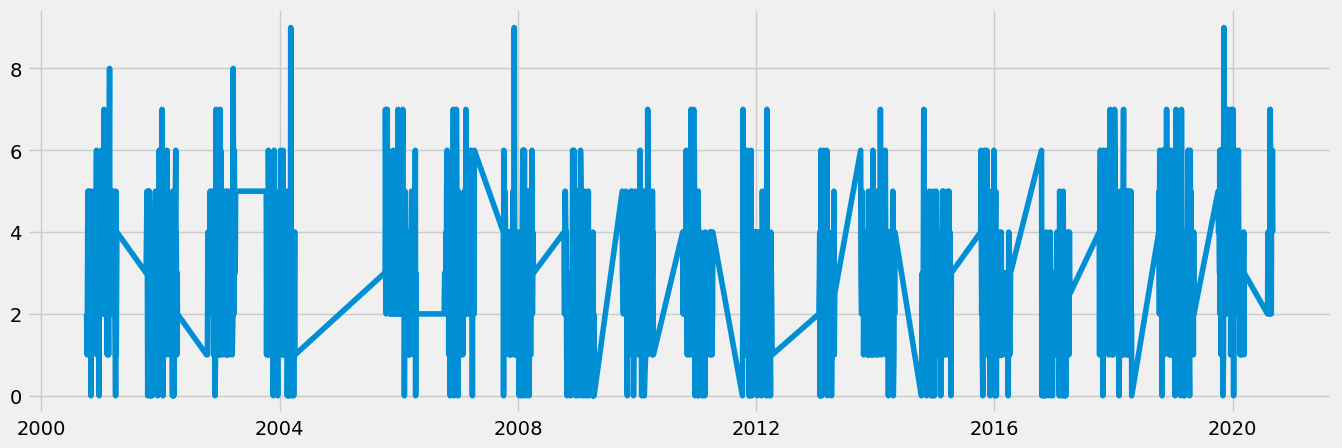

In [46]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(game_player_colo_sub_2)

In [64]:
# Create subset for date testing

game_player_colo_sub_3 = game_player_colo_sub_2

In [65]:
game_player_colo_sub_3.head()

,team_goals
datetime,
2000-10-04,2.0
2000-10-08,1.0
2000-10-10,3.0
2000-10-12,5.0
2000-10-14,3.0


In [66]:
game_player_colo_sub_3 = game_player_colo_sub_3.resample('M').mean()

In [67]:
game_player_colo_sub_3.head()

,team_goals
datetime,
2000-10-31,3.000000
2000-11-30,3.250000
2000-12-31,2.928571
2001-01-31,3.857143
2001-02-28,3.800000


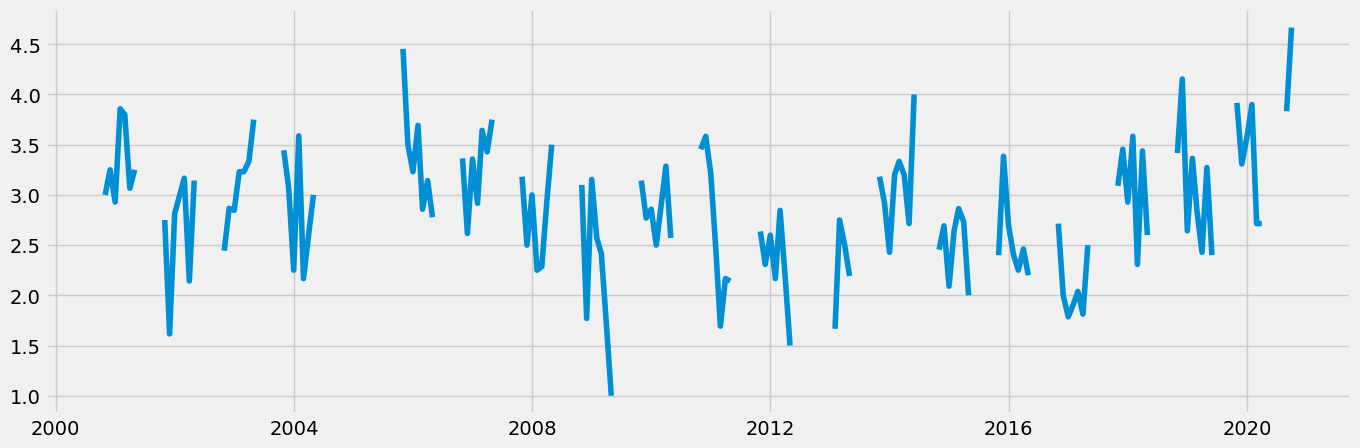

In [54]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(game_player_colo_sub_3)

In [70]:
game_player_colo_sub_3['team_goals'] = game_player_colo_sub_3['team_goals'].fillna(0)

In [71]:
game_player_colo_sub_3.head(15)

,team_goals
datetime,
2000-10-31,3.000000
2000-11-30,3.250000
2000-12-31,2.928571
2001-01-31,3.857143
2001-02-28,3.800000
2001-03-31,3.066667
2001-04-30,3.250000
2001-05-31,0.000000
2001-06-30,0.000000


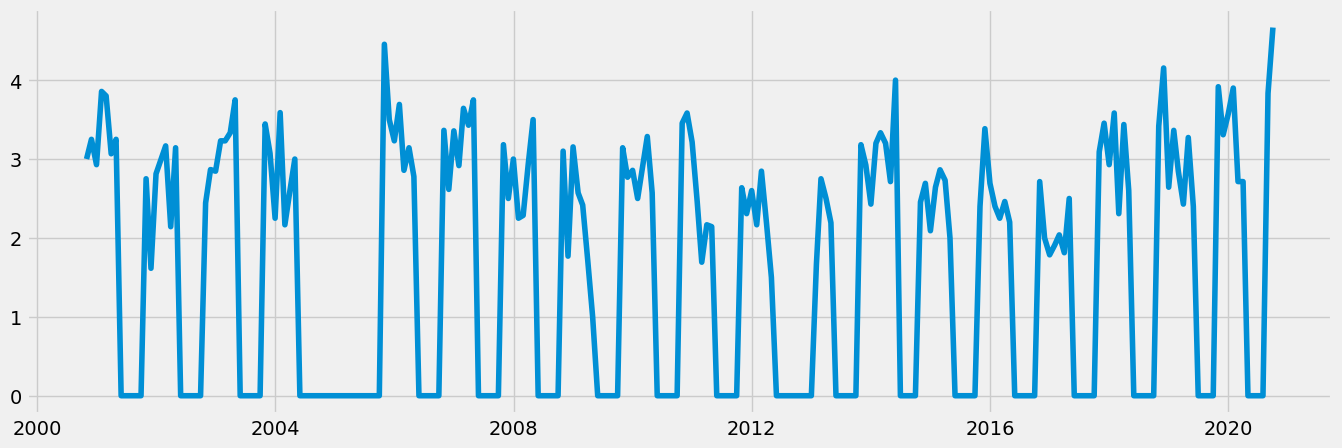

In [72]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(game_player_colo_sub_3)

## Time-series analysis: decomposition

In [73]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(game_player_colo_sub_3, model='additive')

In [74]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

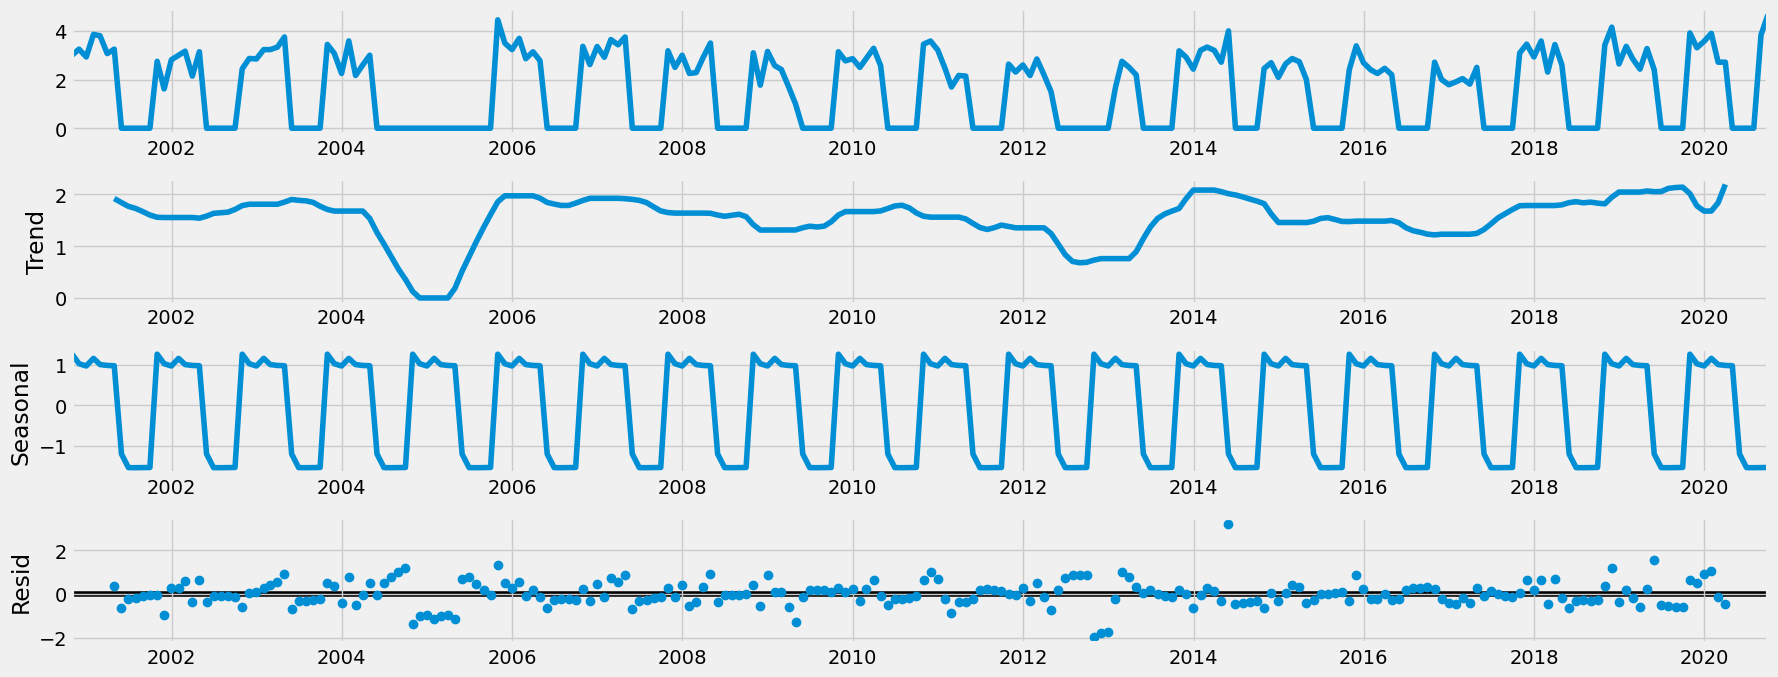

In [75]:
# Plot the separate components

decomposition.plot()
plt.show()

Looking at the level there is a lot of up and downs with the missing month from the hockey off seasons. Looking at the trend overall there is a fairly consistant line with very few fluctuations. There is seasonality present but that was expected as there is an off season with hockey so there are months with no team goals. Overall there is a little to no noise with the small jumps here and there. 

## Testing for stationarity

In [76]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(game_player_colo_sub_3['team_goals'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.398328
p-value                          0.011016
Number of Lags Used             13.000000
Number of Observations Used    226.000000
Critical Value (1%)             -3.459620
Critical Value (5%)             -2.874415
Critical Value (10%)            -2.573632
dtype: float64


Test statistic is -3.398 < critical value (5%) of -2.874
This tells me that the null hypothesis is rejected and there is no unit root data and that the data is stationary.

## Checking autocorrelations

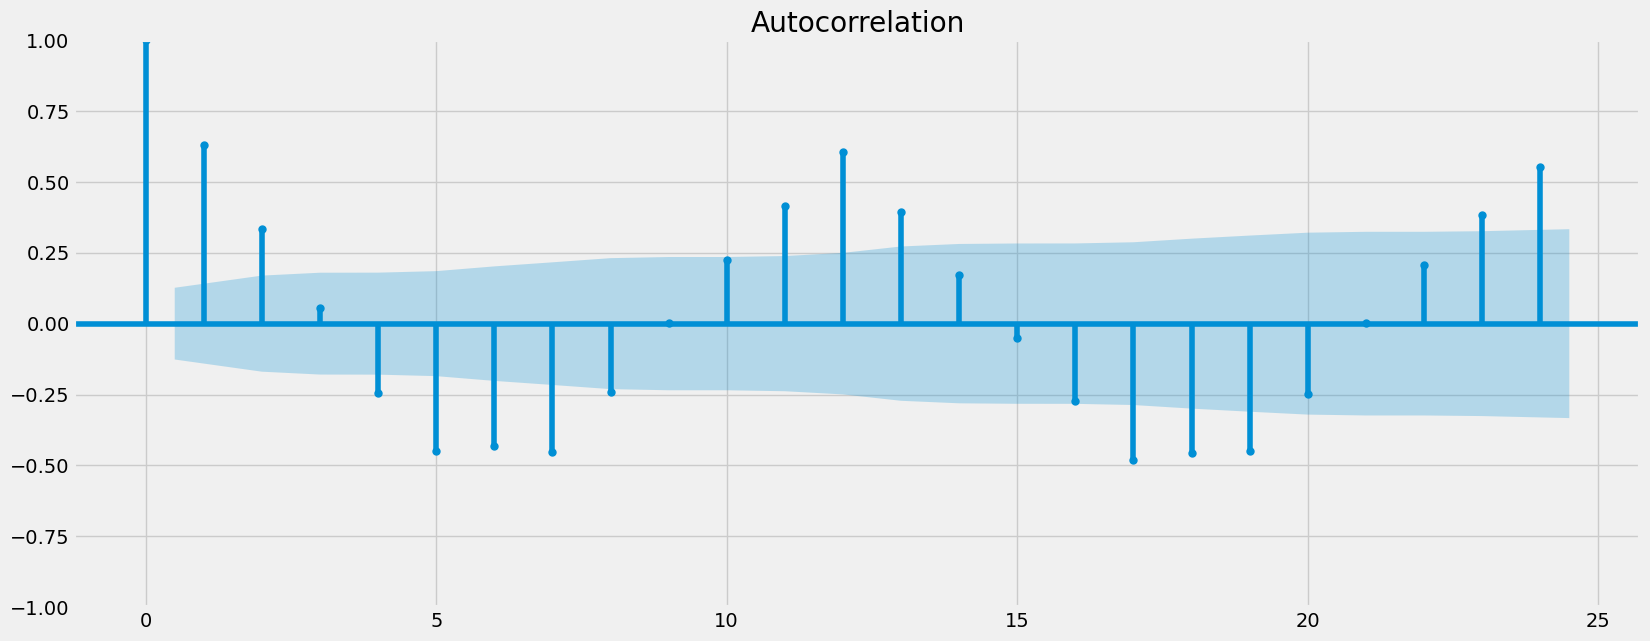

In [78]:
# Here, you import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(game_player_colo_sub_3)
plt.show()

There are quite a few lags above so I'm going to try a round of differencing to see if I can improve this

## Differencing

In [79]:
game_player_colo_diff = game_player_colo_sub_3 - game_player_colo_sub_3.shift(1)

In [80]:
game_player_colo_diff.head()

,team_goals
datetime,
2000-10-31,NaN
2000-11-30,0.250000
2000-12-31,-0.321429
2001-01-31,0.928571
2001-02-28,-0.057143


In [81]:
#Dropping missing values from differencing
game_player_colo_diff.dropna(inplace = True)

In [82]:
game_player_colo_diff.head()

,team_goals
datetime,
2000-11-30,0.250000
2000-12-31,-0.321429
2001-01-31,0.928571
2001-02-28,-0.057143
2001-03-31,-0.733333


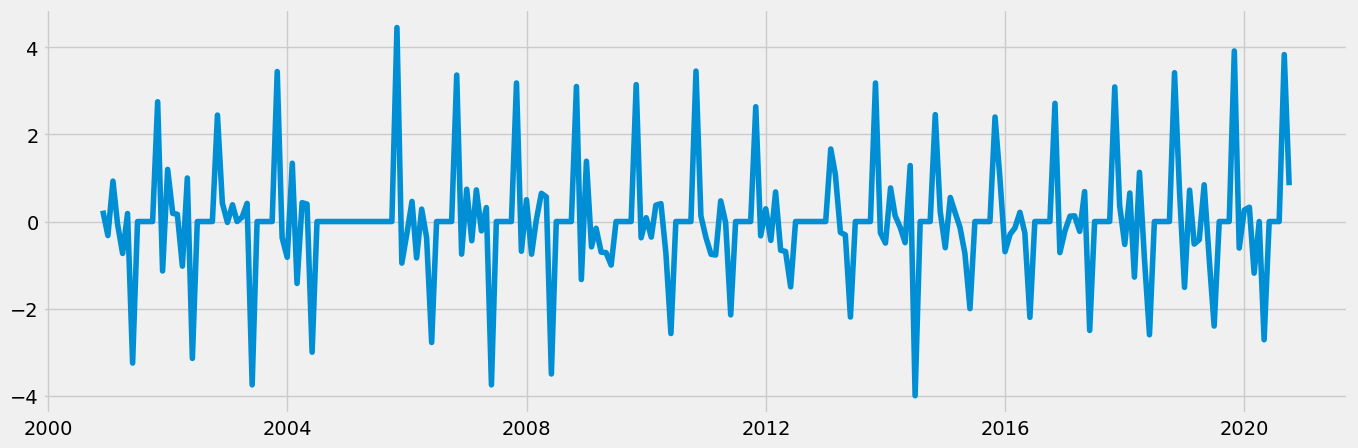

In [83]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(game_player_colo_diff)

In [84]:
#run dickey-fuller test again
#can call dickey_fuller as it was defined previously
dickey_fuller(game_player_colo_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.775238e+00
p-value                        2.580765e-09
Number of Lags Used            1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


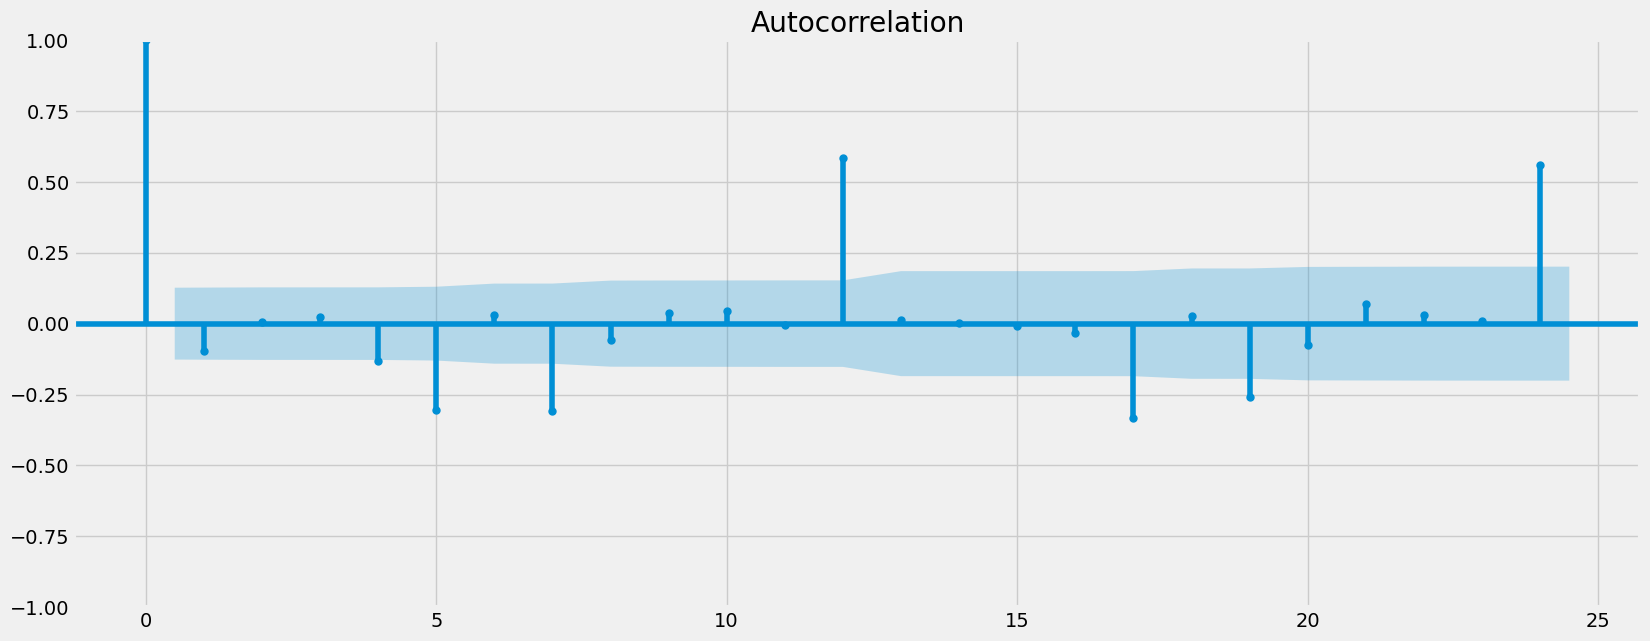

In [85]:
#Checking new autocorrelations
plot_acf(game_player_colo_diff)
plt.show()

After the differencing there is a lot fewer lags than before. My biggest worry comes from the new Dickey-Fuller testing as the p-value is very high compared to before (2.581 with differencing and 0.011 without it). I have both test and will be currious on input. 